In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/clean_churn.csv")
df.shape

(7032, 21)

In [3]:
# Set the target
y = df["Churn"]

# Set the features
X = df.drop(columns=["Churn"])

# Identify categorical variables and numerical variables
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(exclude="object").columns.tolist()

categorical_cols, numerical_cols

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'tenure_group'],
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

In [4]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

Stratification preserves churn proportions in both training and test sets.

In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

In [6]:
model = LogisticRegression(
    max_iter=1000,
    solver="liblinear"
)

In [7]:
pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ]
)

In [8]:
# Train the model
pipeline.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
# Prediction
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[1152,  139],
       [ 222,  245]])

In [10]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.64      0.52      0.58       467

    accuracy                           0.79      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.79      0.79      1758



The model achieves reasonable precision–recall balance, with higher recall for non-churners and moderate performance on churners.

In [11]:
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.8387626742213014

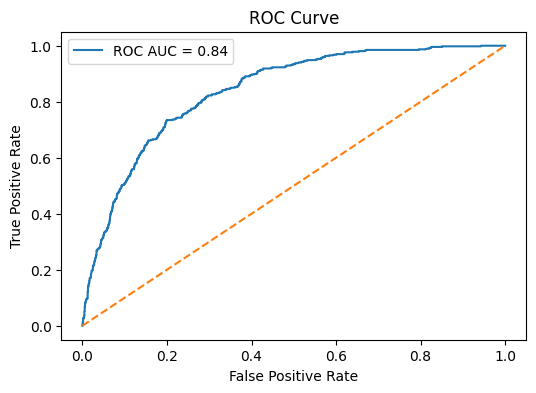

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("../figures/roc_curve.png", bbox_inches="tight")
plt.show()


### Model Interpretation
- Logistic regression was chosen for interpretability and business relevance
- Model performance indicates strong discriminatory power
- Results align with EDA and statistical findings: tenure, pricing, and contract type are key churn drivers

### Model Interpretation
- Logistic regression was chosen for interpretability and business relevance
- Model performance indicates strong discriminatory power
- Results align with EDA and statistical findings: tenure, pricing, and contract type are key churn drivers